In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# importing data

data = pd.read_excel('https://github.com/olzhasshortanbaiuly/PETE601_Project/raw/main/dataset_pete601_proj.xlsx')
data.head()

,"Area, acres","Porosity, %","Permeability, md","Depth, ft","Gravity, °API","Oil, cp","Oil, °F.","Satur., % start","Satur., % end","Tot.prod., b/d","Enh.prod., b/d"
0,"6,200",35,"1,000-3,000","300-1,400",13-14,"1,500-4,000",95,75,20,"33,000","33,000"
1,60,60,1-5,"1,000-1,800",28-30,2-50,110,45,20,"5,000","1,500"
2,574,32,"200-2,500","825-1,650",12-13,"2,000-10,000",84-98,60,10,"4,611","4,611"
3,290,34,"800-1,000","650-1,000",9-10,"11,500-28,000",84,55,10,"1,692","1,692"
4,600,36,"1,000-3,000","1,000",11-14,"1,000-2,000",95-105,65,20,"3,500","3,500"


In [3]:
# column names

data.columns

Index(['Area, acres', 'Porosity, %', 'Permeability, md', 'Depth, ft',
       'Gravity, °API', 'Oil, cp', 'Oil, °F.', 'Satur., % start',
       'Satur., % end', 'Tot.prod., b/d', 'Enh.prod., b/d'],
      dtype='object')

In [4]:
# shape of the data

data.shape

(706, 11)

In [5]:
# dropping the rows with any NaN values
data = data.dropna(axis = 0, how = 'any')
data.shape

(688, 11)

In [6]:
# dropping duplicates

data.drop_duplicates(inplace=True)
data.shape

(656, 11)

In [7]:
for col in data.columns:
  print(col)

Area, acres
Porosity, %
Permeability, md
Depth, ft
Gravity, °API
Oil, cp
Oil, °F.
Satur., % start
Satur., % end
Tot.prod., b/d
Enh.prod., b/d


In [8]:
#get the all possible unique values for each of the data columns

for col in data.columns:
  print(col + ' has this unique values: ')
  print(data[col].unique())

Area, acres has this unique values: 
['6,200' '60' '574' '290' '600' '100' '170' '160' '1,230' '15' '50' '66'
 '152' '125' '546' '552' '1,214' '80' '1,200' '1,291' '9,660' '20' '30'
 '90' '94' '3,380' '300' '320' '44' '37' '700' '780' '8,960' '51,200'
 '7,680' '4,640' '20,800' '7,800' '11,500' '2,924' '10,010' '10,400'
 '3,500' '5' '25' '569' '8,559' '1,100' '2,320' '2,500' '18,000' '3,600'
 '5,500' '1,084' '4,900' '285' '120' '85' '70' '200' '190' '840' '3,398'
 '8,240' '280' '212' '12,600' '4,100' '2,600' '1,800' '10,800' '880'
 '10,104' '1,020' '13,440' '8,500' '1,120' '340' '4,392' '650' '15,699'
 '500' '480' 0 '49,900' '1,345' '790' '1,400' '810' '3,400' '10' '1,953'
 '246' '4,437' '2,870' '6,412' '2,684' '6,000' '1,600' '1,143' '1,235'
 '1,179' '1,326' '1,155' '1,280' '3,100' '2,090' '12,000' '1,240' '5,700'
 '1,048' '1,204' '1,160' '1,700' '1,780' '27,848' '240' '6,183' '2,010'
 '16,300' '11,000' '7,000' '330' '2,084' '1,923' '640' '98' '2,100' '180'
 '26,000' '55,000' '4,000' '

In [9]:
import re

def process_value(value):
    # If the value is already numeric, return as is
    if isinstance(value, (float, int)):
        return value

    # Convert the value to a string and remove commas and spaces
    value_str = re.sub(r'[, ]+', '', str(value))

    # Replace various dash types with a standard hyphen
    value_str = value_str.replace('–', '-').replace('—', '-')

    # Remove 'ft' or similar units if present
    value_str = re.sub(r'[^\d.-]+', '', value_str)

    # Check if there is a hyphen indicating a range
    if '-' in value_str:
        try:
            # Split the value on hyphen to get the start and end of the range
            start_str, end_str = value_str.split('-')
            # Handle cases like '1,000-5,000+'
            end_str = end_str.rstrip('+')
            # Convert both sides to float and compute the average
            start, end = float(start_str), float(end_str)
            return (start + end) / 2
        except ValueError:
            # If conversion fails, return NaN
            return np.nan

    # Attempt to convert to float if there is no hyphen
    try:
        # Handle cases like '5,000+'
        value_str = value_str.rstrip('+')
        return float(value_str)
    except ValueError:
        # If conversion fails, return NaN
        return np.nan

def process_dataframe_or_column(data, columns=None):
    # If columns are provided, only process those
    if columns is not None:
        for col in columns:
            data[col] = data[col].apply(process_value)
    else:
        # Apply to all columns if no specific columns are provided
        for col in data.columns:
            # Apply only to columns with string type
            if data[col].dtype == object:
                data[col] = data[col].apply(process_value)
    return data

# Apply the processing to the entire dataframe
data = process_dataframe_or_column(data)
data = data.dropna(axis = 0, how = 'any') # drop NaN
data.shape

(655, 11)

In [10]:
# Check the unique values again
for col in data.columns:
    print(col + ' has these unique values: ')
    print(data[col].unique())

Area, acres has these unique values: 
[6.2000e+03 6.0000e+01 5.7400e+02 2.9000e+02 6.0000e+02 1.0000e+02
 1.7000e+02 1.6000e+02 1.2300e+03 1.5000e+01 5.0000e+01 6.6000e+01
 1.5200e+02 1.2500e+02 5.4600e+02 5.5200e+02 1.2140e+03 8.0000e+01
 1.2000e+03 1.2910e+03 9.6600e+03 2.0000e+01 3.0000e+01 9.0000e+01
 9.4000e+01 3.3800e+03 3.0000e+02 3.2000e+02 4.4000e+01 3.7000e+01
 7.0000e+02 7.8000e+02 8.9600e+03 5.1200e+04 7.6800e+03 4.6400e+03
 2.0800e+04 7.8000e+03 1.1500e+04 2.9240e+03 1.0010e+04 1.0400e+04
 3.5000e+03 5.0000e+00 2.5000e+01 5.6900e+02 8.5590e+03 1.1000e+03
 2.3200e+03 2.5000e+03 1.8000e+04 3.6000e+03 5.5000e+03 1.0840e+03
 4.9000e+03 2.8500e+02 1.2000e+02 8.5000e+01 7.0000e+01 2.0000e+02
 1.9000e+02 8.4000e+02 3.3980e+03 8.2400e+03 2.8000e+02 2.1200e+02
 1.2600e+04 4.1000e+03 2.6000e+03 1.8000e+03 1.0800e+04 8.8000e+02
 1.0104e+04 1.0200e+03 1.3440e+04 8.5000e+03 1.1200e+03 3.4000e+02
 4.3920e+03 6.5000e+02 1.5699e+04 5.0000e+02 4.8000e+02 0.0000e+00
 4.9900e+04 1.3450e+03 7

In [11]:
data = data[data['Satur., % start'] >= 20]
data.shape

(555, 11)

In [12]:
data = data[data['Satur., % start'] >= data['Satur., % end']]
data.shape

(555, 11)

In [13]:
data = data[data['Permeability, md'] >= 0.1]
data.shape

(529, 11)

In [14]:
data = data[data['Porosity, %'] <= 40]
data.shape

(522, 11)

In [15]:
data[data['Permeability, md'] >= 0.1].value_counts()

Area, acres  Porosity, %  Permeability, md  Depth, ft  Gravity, °API  Oil, cp   Oil, °F.  Satur., % start  Satur., % end  Tot.prod., b/d  Enh.prod., b/d
320.0        37.0         5500.0            1400.0     12.0           3000.00   100.0     65.0             20.0           6000.0          4500.0            2
1255.0       27.0         1250.0            2300.0     13.0           825.00    124.0     76.0             0.0            9500.0          9500.0            2
90.0         34.0         850.0             1150.0     15.5           345.00    100.0     80.0             60.0           360.0           345.0             2
94.0         34.0         1250.0            450.0      11.0           20000.00  80.0      85.0             60.0           200.0           200.0             2
2500.0       8.0          300.0             6400.0     43.0           0.39      195.0     67.0             50.0           189.0           189.0             1
                                                         

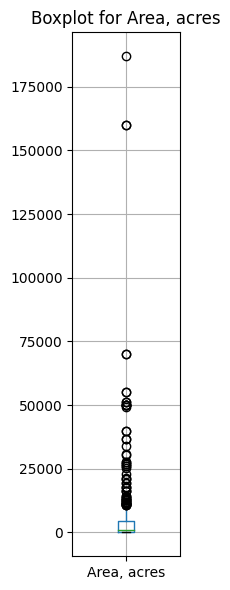

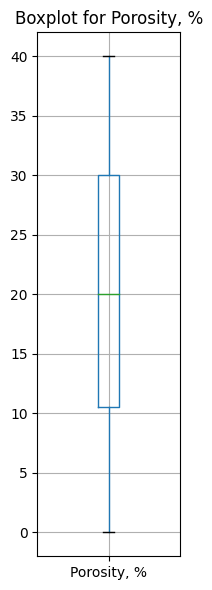

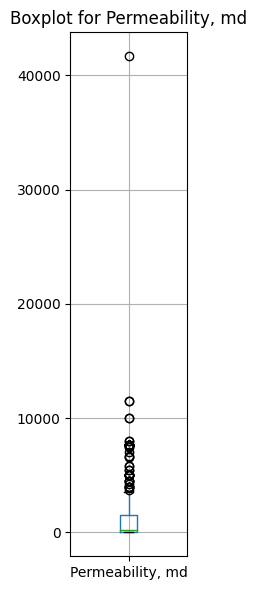

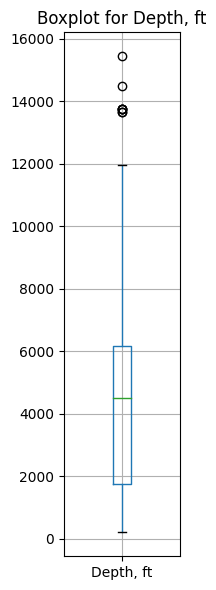

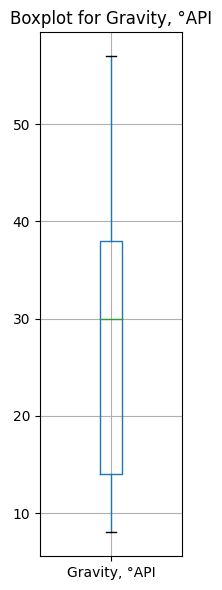

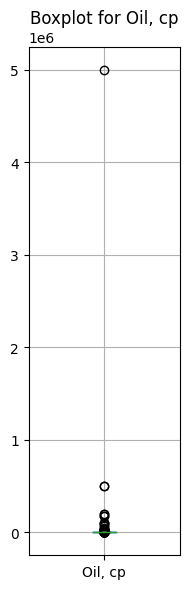

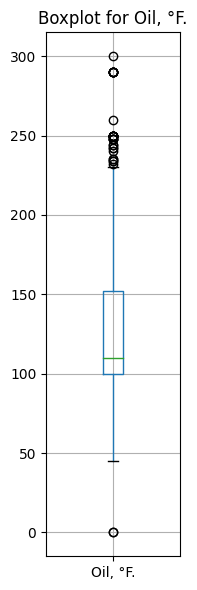

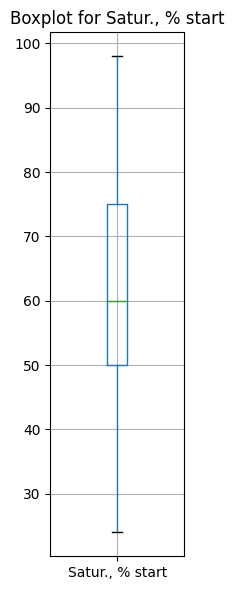

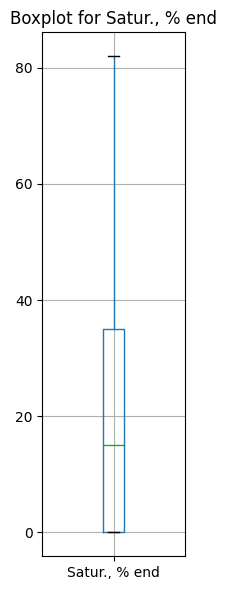

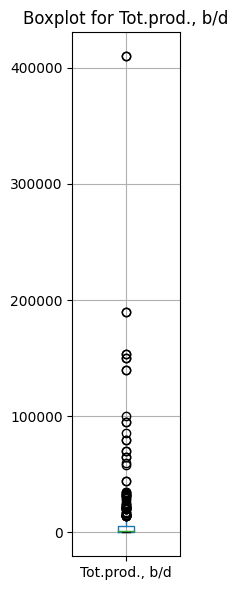

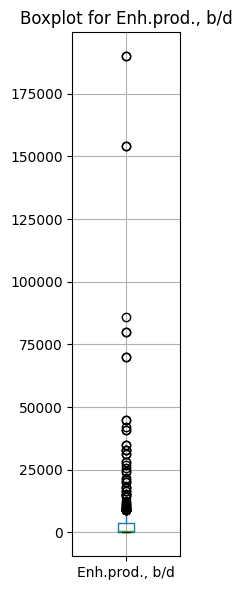

In [16]:
for col in data.columns:
  data[[col]].boxplot(figsize=(2,6))
  plt.title("Boxplot for {}".format(col))
  plt.tight_layout()
  plt.show()

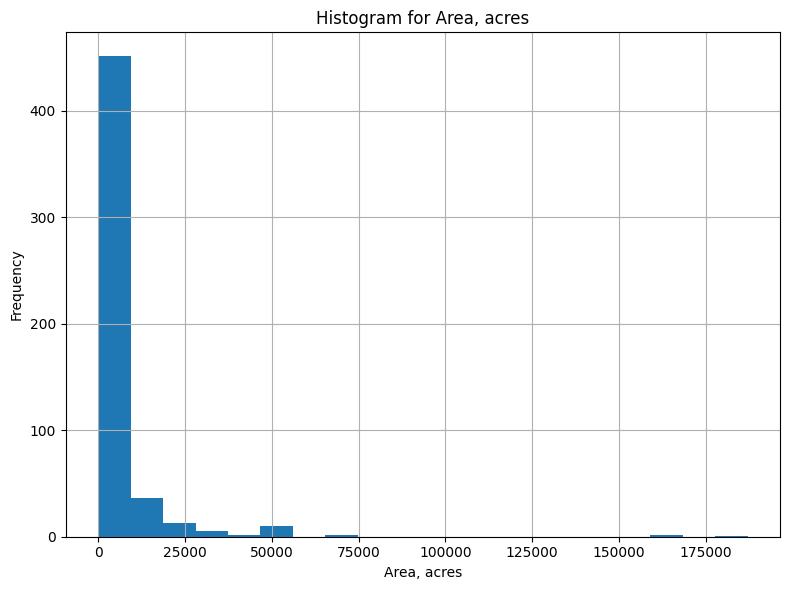

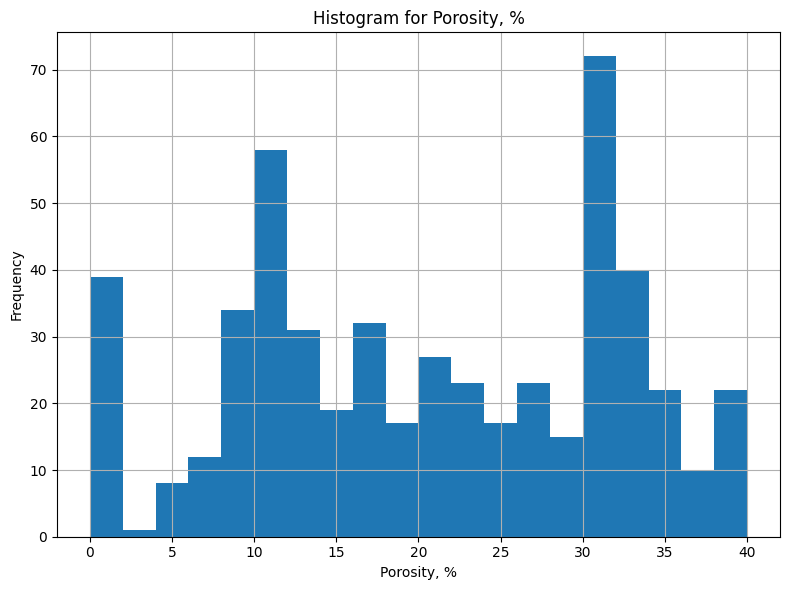

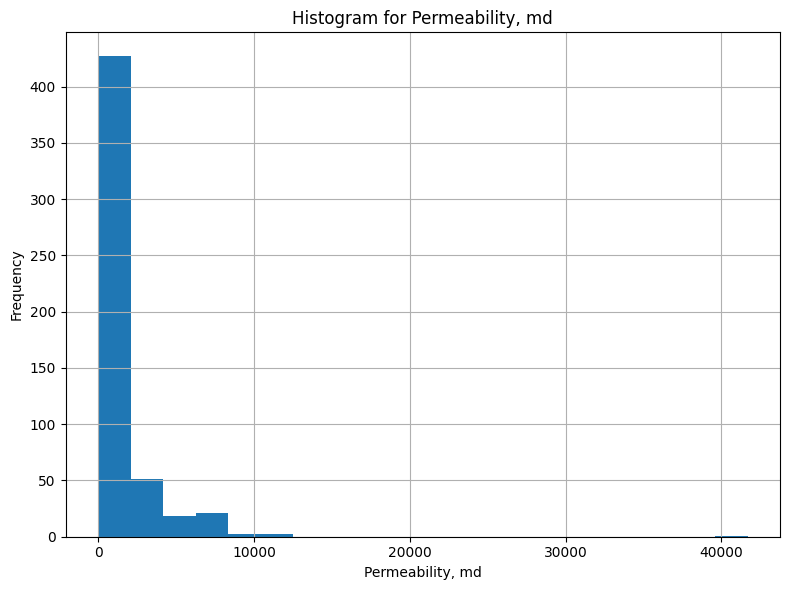

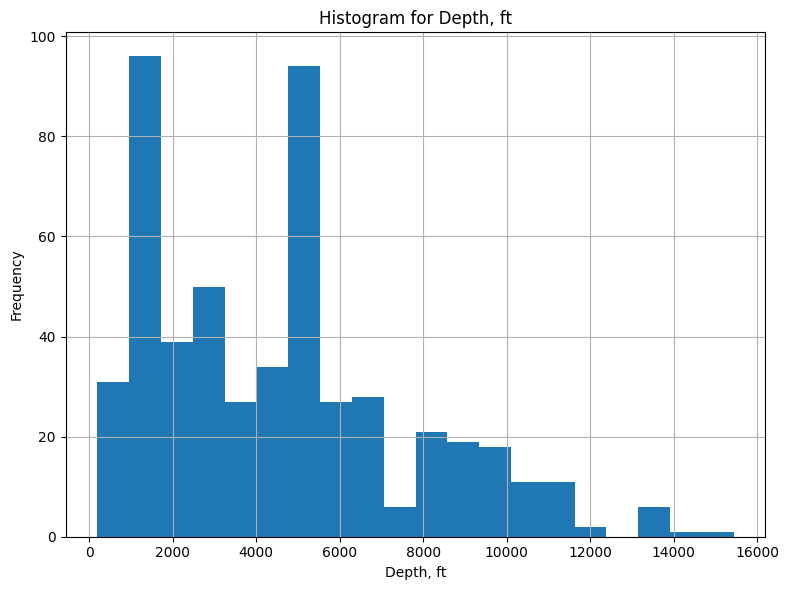

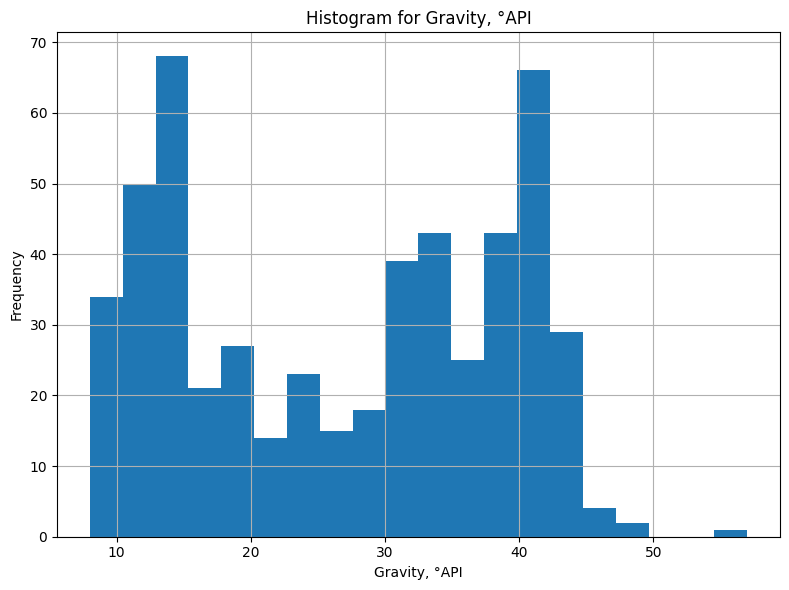

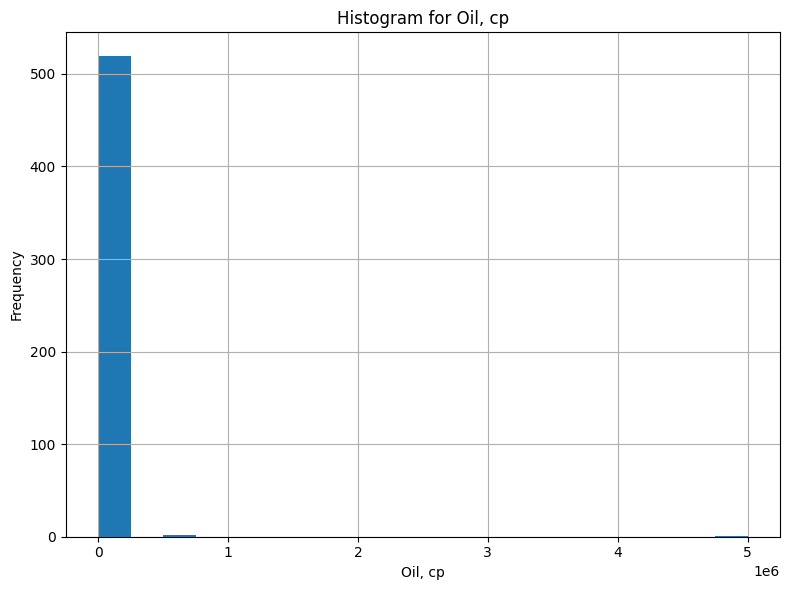

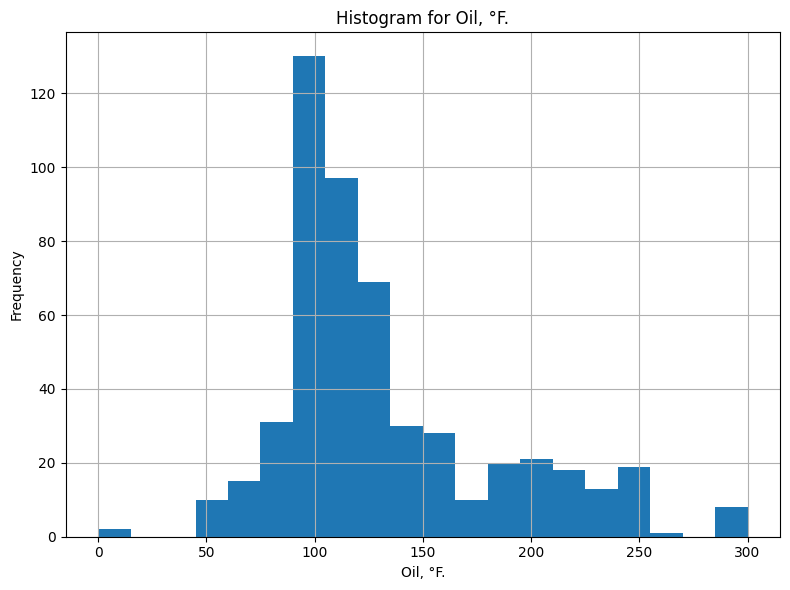

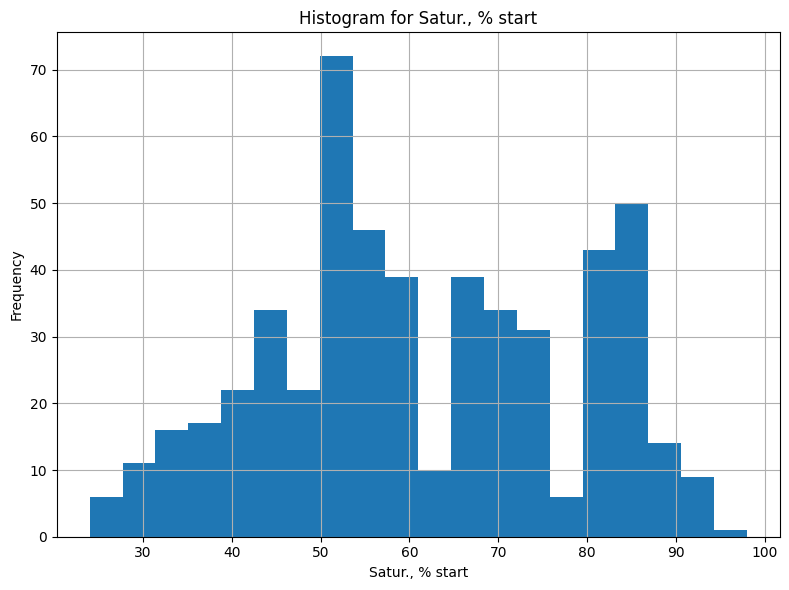

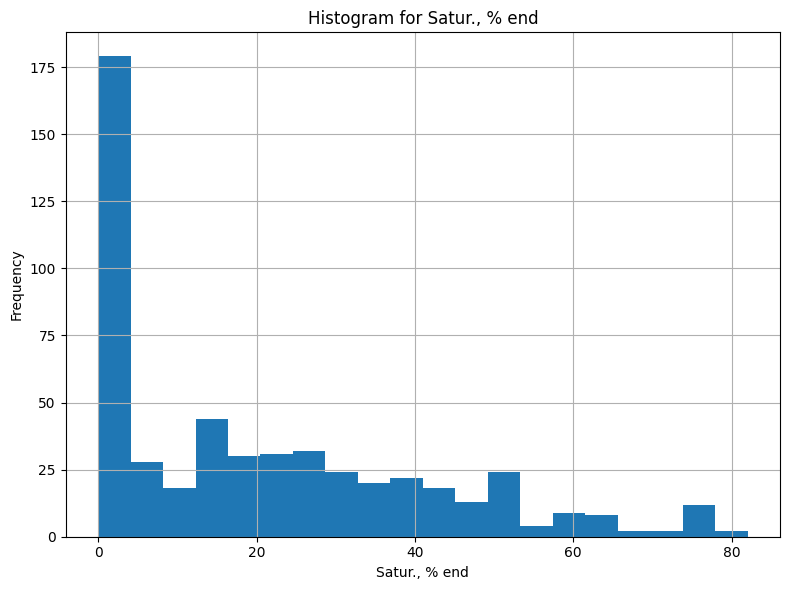

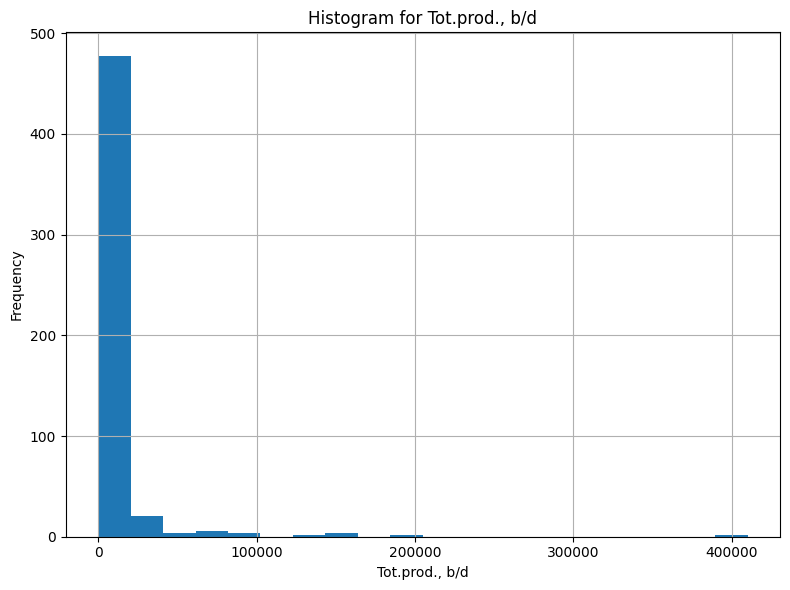

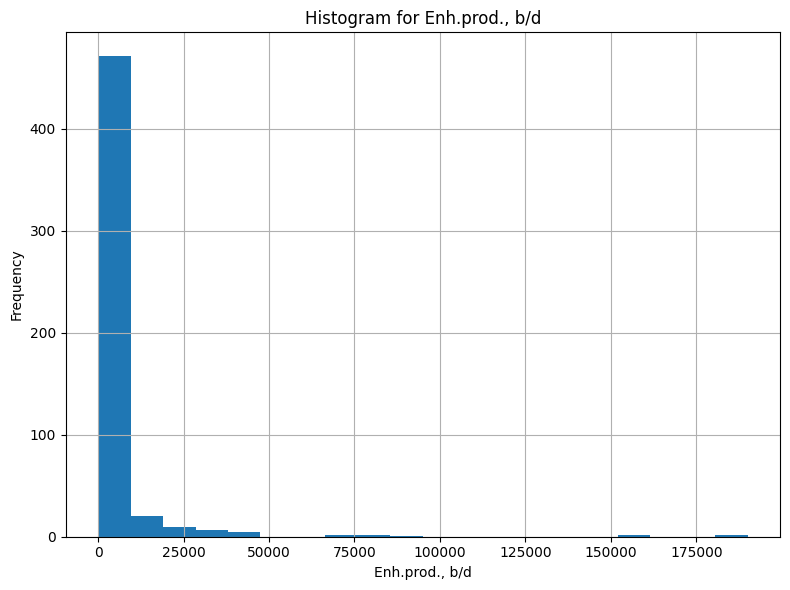

In [17]:
for col in data.columns:
  data[[col]].hist(bins = 20, figsize=(8,6))
  plt.title("Histogram for {}".format(col))
  plt.xlabel("{}".format(col))
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show()

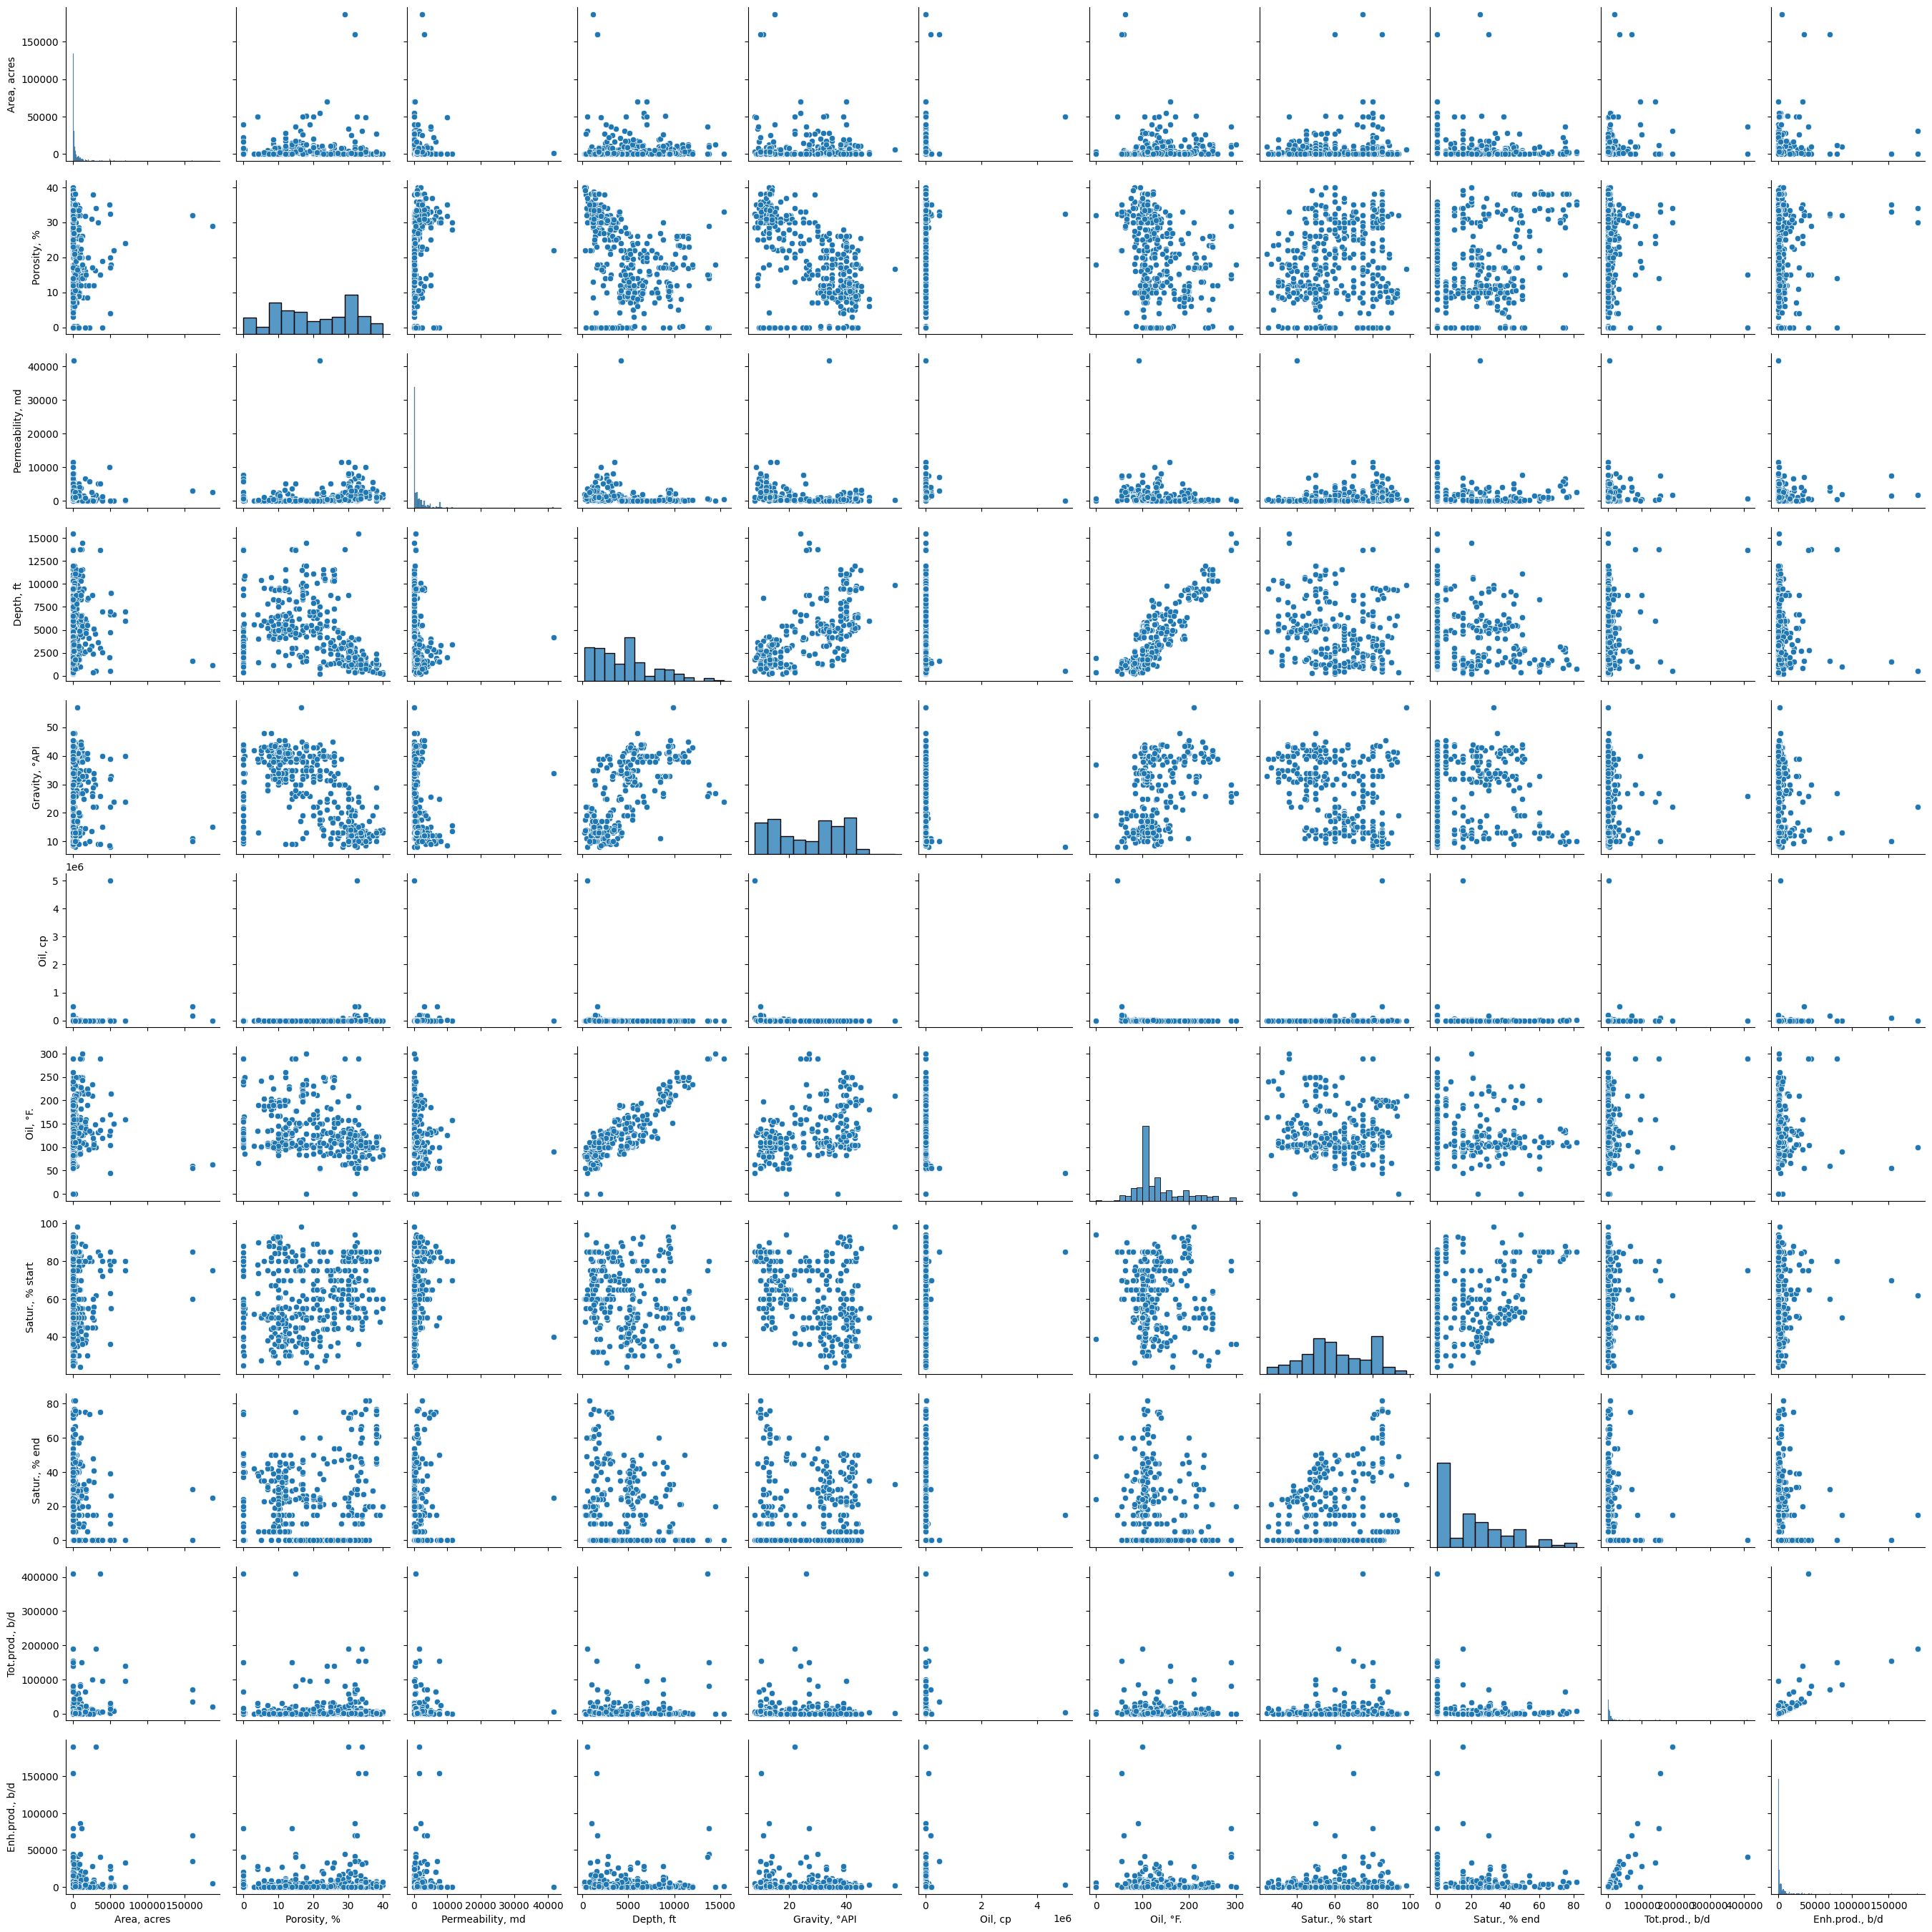

In [18]:
sns.pairplot(data)

In [19]:
data[data['Area, acres'] >= 150000].head()

,"Area, acres","Porosity, %","Permeability, md","Depth, ft","Gravity, °API","Oil, cp","Oil, °F.","Satur., % start","Satur., % end","Tot.prod., b/d","Enh.prod., b/d"
219,160000.0,32.0,3000.0,1600.0,11.0,170000.0,60.0,60.0,30.0,70000.0,70000.0
606,160000.0,32.0,3000.0,1600.0,10.0,500000.0,55.0,85.0,0.0,35000.0,35000.0
615,187000.0,29.0,2500.0,1150.0,15.0,3000.0,63.0,75.0,25.0,20105.0,5000.0


In [20]:
data[data['Permeability, md'] >= 35000].head()

,"Area, acres","Porosity, %","Permeability, md","Depth, ft","Gravity, °API","Oil, cp","Oil, °F.","Satur., % start","Satur., % end","Tot.prod., b/d","Enh.prod., b/d"
513,1155.0,22.0,41675.0,4200.0,34.0,1.5,91.0,40.0,25.0,5090.0,64.0


In [21]:
data[data['Tot.prod., b/d'] >= 35000].head()

,"Area, acres","Porosity, %","Permeability, md","Depth, ft","Gravity, °API","Oil, cp","Oil, °F.","Satur., % start","Satur., % end","Tot.prod., b/d","Enh.prod., b/d"
32,9660.0,32.0,2000.0,1000.0,13.0,4000.00,90.0,50.0,15.0,86000.0,86000.0
165,26000.0,17.0,400.0,8800.0,27.0,0.90,210.0,50.0,0.0,100000.0,28000.0
174,204.0,26.0,275.0,6000.0,24.0,2.00,160.0,75.0,0.0,140000.0,33000.0
176,70000.0,24.0,20.0,7000.0,40.0,0.45,160.0,80.0,0.0,95000.0,0.0
219,160000.0,32.0,3000.0,1600.0,11.0,170000.00,60.0,60.0,30.0,70000.0,70000.0


In [22]:
data[data['Oil, cp'] >= 4000000].head()

,"Area, acres","Porosity, %","Permeability, md","Depth, ft","Gravity, °API","Oil, cp","Oil, °F.","Satur., % start","Satur., % end","Tot.prod., b/d","Enh.prod., b/d"
220,50000.0,32.5,5.05,500.0,8.0,5000000.0,45.0,85.0,15.0,2750.0,2750.0


In [23]:
data[data['Enh.prod., b/d'] >= 150000].head()

,"Area, acres","Porosity, %","Permeability, md","Depth, ft","Gravity, °API","Oil, cp","Oil, °F.","Satur., % start","Satur., % end","Tot.prod., b/d","Enh.prod., b/d"
224,0.0,35.0,1500.0,1509.0,10.2,100000.0,55.0,70.0,0.0,154000.0,154000.0
292,30878.0,34.0,1600.0,550.0,22.0,350.0,100.0,62.0,15.0,190000.0,190000.0
609,400.0,33.0,7500.0,1509.0,10.2,100000.0,55.0,70.0,0.0,154000.0,154000.0
635,58.0,30.0,1600.0,550.0,22.0,350.0,100.0,62.0,15.0,190000.0,190000.0


In [24]:
# Normalizing data using formula x_n = (x - x_min) / (x_max - x_min)

def normalize_column(column):
    """Normalize a Pandas series using min-max scaling."""
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

# Normalize each column in the dataframe
normalized_data = data.apply(normalize_column)

print(normalized_data)


     Area, acres  Porosity, %  Permeability, md  Depth, ft  Gravity, °API  \
0       0.033155       0.8750          0.047956   0.042651       0.112245   
2       0.003070       0.8000          0.032359   0.068077       0.091837   
3       0.001551       0.8500          0.021560   0.041010       0.030612   
4       0.003209       0.9000          0.047956   0.052493       0.091837   
5       0.000535       1.0000          0.027559   0.009843       0.122449   
..           ...          ...               ...        ...            ...   
701     0.001824       0.8375          0.016161   0.068898       0.104082   
702     0.000187       0.9525          0.016161   0.066207       0.104082   
703     0.002198       0.9500          0.023960   0.078740       0.104082   
704     0.014733       0.9525          0.023960   0.101444       0.104082   
705     0.017209       0.9525          0.023960   0.101444       0.104082   

     Oil, cp  Oil, °F.  Satur., % start  Satur., % end  Tot.prod., b/d  \
0

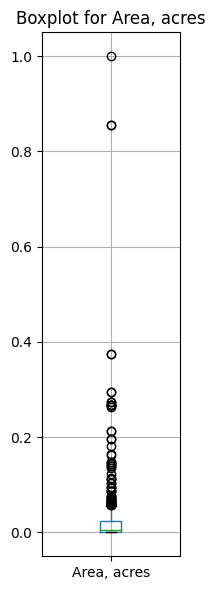

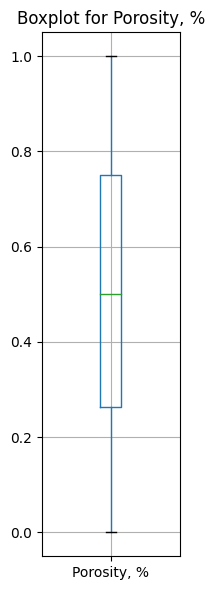

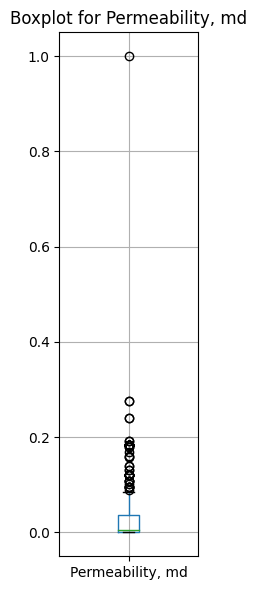

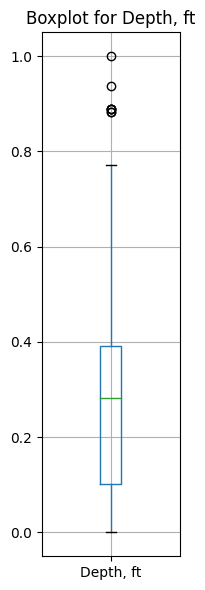

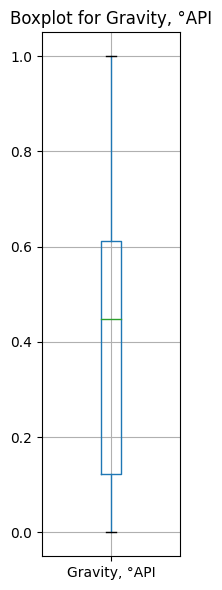

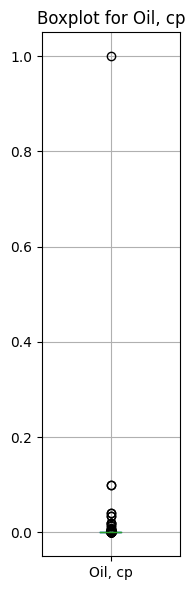

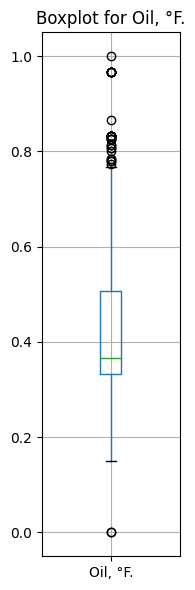

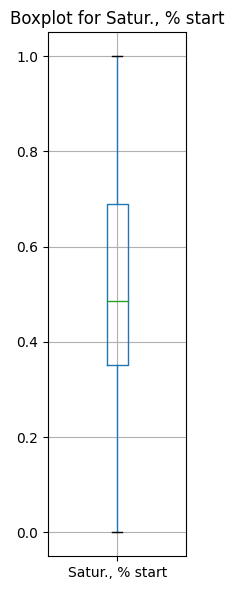

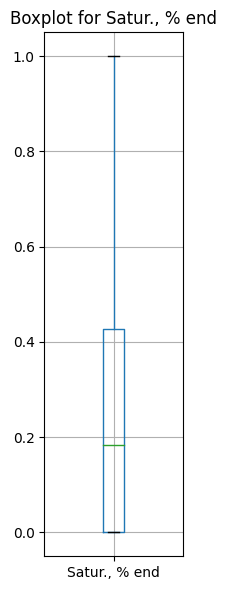

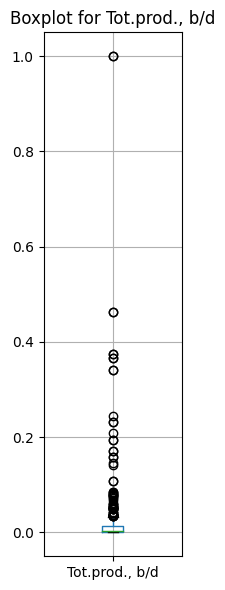

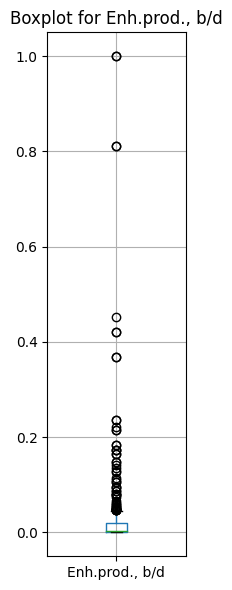

In [25]:
# Box plots with normalized data

for col in data.columns:
  normalized_data[[col]].boxplot(figsize=(2,6))
  plt.title("Boxplot for {}".format(col))
  plt.tight_layout()
  plt.show()

In [28]:
!pip install openpyxl


In [30]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/PETE 601/dataset_pete601_proj_processed.xlsx'  # specify your path here
data.to_excel(path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
